# Polynomial Regression Hackathon
This notebook walks you through linear and polynomial regression.
At the end, you’ll run a hackathon challenge: find the best polynomial fit for housing data.


## Warm-up: Simple Linear Regression

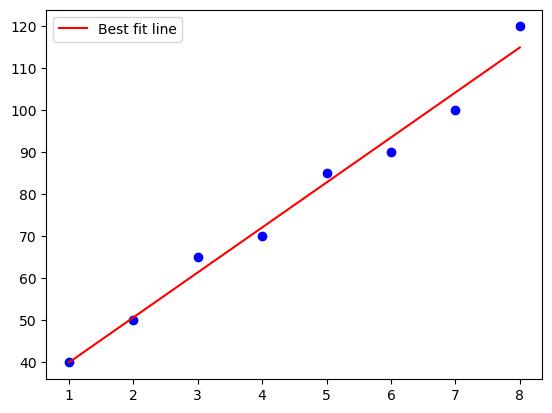

Slope: 10.714285714285712 Intercept: 29.2857142857143


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5,6,7,8]).reshape(-1, 1)
y = np.array([40, 50, 65, 70, 85, 90, 100, 120])

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', label='Best fit line')
plt.legend(); plt.show()
print('Slope:', model.coef_[0], 'Intercept:', model.intercept_)

## Polynomial Regression Example

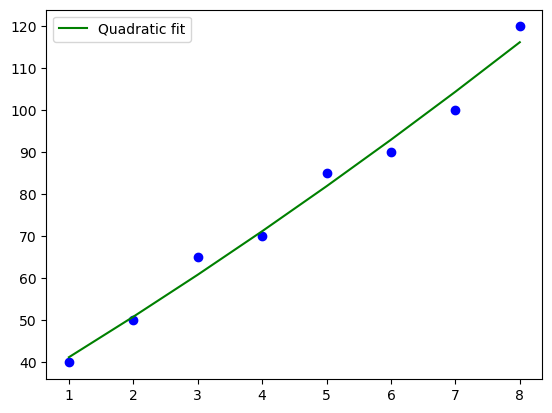

In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model_poly.predict(X_poly), color='green', label='Quadratic fit')
plt.legend(); plt.show()

## Hackathon Dataset

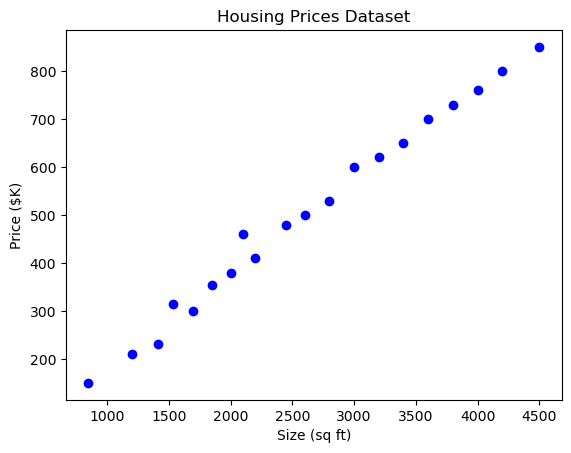

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Larger housing dataset
data = {
    "Size": [850, 1200, 1416, 1534, 1700, 1850, 2000, 2104, 2200, 2450,
             2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4500],
    "Price": [150, 210, 232, 315, 300, 355, 380, 460, 410, 480,
              500, 530, 600, 620, 650, 700, 730, 760, 800, 850]
}
df = pd.DataFrame(data)

X = df[["Size"]]
y = df["Price"]

plt.scatter(X, y, color="blue")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($K)")
plt.title("Housing Prices Dataset")
plt.show()

## Step 1. Define polynomial fit function (TODO)

In [26]:
def fit_polynomial(X, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred = model_poly.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    return model_poly, poly, y_pred,mse


## Step 2. Try polynomials 1–4 and compute MSE (TODO)

In [20]:
results={}
y_preds={}
X_range=np.linspace(min(X.values.flatten()),max(X.values.flatten()),200).reshape(-1,1)
for d in range(1, 5):
    y_pred_d, poly_d, mse_d = fit_polynomial(X, y, d)
    results[d] = mse_d
    y_preds[d] = y_pred_d
    # TODO: Loop over polynomials 1–4, compute errors, and plot fits
print('MSE by degree:', results)


MSE by degree: {1: 379.4650178690999, 2: 308.6571322625057, 3: 308.22363170863775, 4: 300.76642874928456}


## Step 3. Compare models visually (TODO)

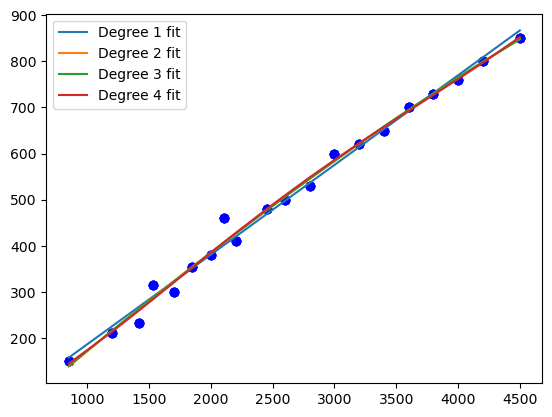

In [29]:
# TODO: Plot polynomial fits for different degrees
for d in range(1, 5):
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_preds[d], label=f'Degree {d} fit')
    plt.legend()
plt.show()

## Step 4. Train/Test Split (TODO)

Train errors: {1: 488.70890657577905, 2: 397.5765155549093, 3: 363.8787489830523, 4: 342.2987251924138}
Test errors: {1: 179.60441561003836, 2: 139.6951973762023, 3: 1046.6710084191138, 4: 4681.002818117322}


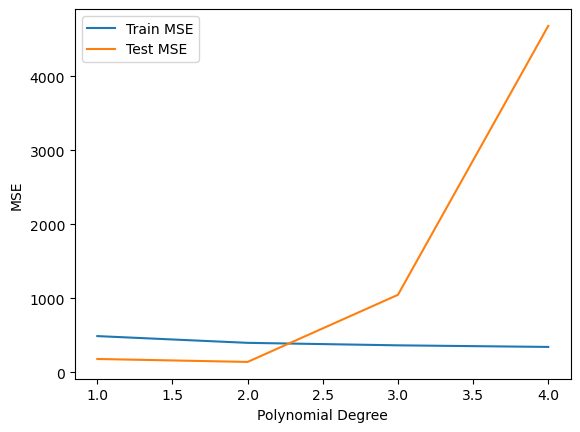

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
train_err,test_err={},{}


for d in range(1,5):
    model_poly_d, poly_d, y_pred_d, mse_d = fit_polynomial(X_train, y_train, d)
    predictions_test = model_poly_d.predict(poly_d.transform(X_test))

    # TODO: Loop over polynomials 1–4, fit models of different polynomials, compare train and test MSE
    # Don't forget... you can use the .fit_transform() method to transform your training AND testing data to generate the polynomial features :) 
    train_err[d]=mean_squared_error(y_train,y_pred_d)
    test_err[d]=mean_squared_error(y_test,predictions_test)
        
print('Train errors:',train_err) 
print('Test errors:',test_err)
plt.plot(train_err.keys(),train_err.values(),label='Train MSE')
plt.plot(test_err.keys(),test_err.values(),label='Test MSE')
plt.xlabel('Polynomial Degree'); plt.ylabel('MSE'); plt.legend(); plt.show()